In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [2]:
num_rep = 100000 # exected 10 times in inner loop
rng = np.random.default_rng(2804)
list_m = [5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 400, 600, 800, 1000]
list_alpha = [0.01, 0.04, 0.125, 0.25, 0.5, 1, 2, 5, 10]
df_results = pd.DataFrame(index=list_alpha, columns=list_m)

for m in list_m:
    ssb_utility = np.triu(np.ones((m, m))) - np.tril(np.ones((m, m)))
    for alpha in list_alpha:
        df_results.loc[alpha, m] = 0
        alpha_vec = np.ones(m) * alpha
        for _ in range(10):
            lotteries = rng.dirichlet(alpha_vec, (3, num_rep))
            comp01 = (np.sum(lotteries[0,:,:] @ ssb_utility * lotteries[1,:,:], axis=1) > 0).astype(int)
            comp12 = (np.sum(lotteries[1,:,:] @ ssb_utility * lotteries[2,:,:], axis=1) > 0).astype(int)
            comp20 = (np.sum(lotteries[2,:,:] @ ssb_utility * lotteries[0,:,:], axis=1) > 0).astype(int)
            num_intr = np.sum(comp01 + comp12 + comp20 == 0) + np.sum(comp01 + comp12 + comp20 == 3)
            df_results.loc[alpha, m] += num_intr
    print(f"{m} completed")

5 completed
10 completed
15 completed
20 completed
30 completed
50 completed
70 completed
100 completed
150 completed
200 completed
300 completed
400 completed
600 completed
800 completed
1000 completed


In [3]:
df_results

,5,10,15,20,30,50,70,100,150,200,300,400,600,800,1000
0.010,140,459,1075,1836,3663,6904,9595,11538,13500,13478,12517,10960,8925,7474,6307
0.040,501,3168,5896,8267,10945,12126,11829,10809,8757,7150,5533,4352,3072,2382,1805
0.125,1717,6880,9171,9874,9661,7978,6546,4971,3668,2874,1982,1562,1092,808,636
0.250,2655,7123,7882,7571,6562,4866,3788,2896,2056,1423,1119,785,537,413,324
0.500,2853,5610,5319,4869,3773,2733,2088,1454,1051,753,556,391,260,189,175
1.000,2303,3560,3107,2684,2039,1389,1109,800,504,393,262,193,125,111,81
2.000,1559,2073,1743,1445,1110,704,532,372,274,203,140,99,46,46,37
5.000,727,859,721,607,438,290,214,149,120,87,56,42,29,21,17
10.000,393,408,358,300,234,152,119,70,50,45,22,18,6,10,11


In [8]:
df_results.to_csv(DATA_DIR / "7_2_dirichlet_alpha.csv")
df_results = pd.read_csv(DATA_DIR / "7_2_dirichlet_alpha.csv", index_col=0)
df_results.columns = [int(col) for col in df_results.columns]
df_results

,5,10,15,20,30,50,70,100,150,200,300,400,600,800,1000
0.010,140,459,1075,1836,3663,6904,9595,11538,13500,13478,12517,10960,8925,7474,6307
0.040,501,3168,5896,8267,10945,12126,11829,10809,8757,7150,5533,4352,3072,2382,1805
0.125,1717,6880,9171,9874,9661,7978,6546,4971,3668,2874,1982,1562,1092,808,636
0.250,2655,7123,7882,7571,6562,4866,3788,2896,2056,1423,1119,785,537,413,324
0.500,2853,5610,5319,4869,3773,2733,2088,1454,1051,753,556,391,260,189,175
1.000,2303,3560,3107,2684,2039,1389,1109,800,504,393,262,193,125,111,81
2.000,1559,2073,1743,1445,1110,704,532,372,274,203,140,99,46,46,37
5.000,727,859,721,607,438,290,214,149,120,87,56,42,29,21,17
10.000,393,408,358,300,234,152,119,70,50,45,22,18,6,10,11


In [9]:
# Ensure all data in df_results is numeric
df_results_numeric = df_results.apply(pd.to_numeric, errors='coerce')
df_results_numeric = df_results_numeric / 10**6
df_results_numeric = df_results_numeric[[5, 10, 15, 20, 30, 50, 100, 200, 400, 600, 1000]]
df_results_numeric

,5,10,15,20,30,50,100,200,400,600,1000
0.010,0.000140,0.000459,0.001075,0.001836,0.003663,0.006904,0.011538,0.013478,0.010960,0.008925,0.006307
0.040,0.000501,0.003168,0.005896,0.008267,0.010945,0.012126,0.010809,0.007150,0.004352,0.003072,0.001805
0.125,0.001717,0.006880,0.009171,0.009874,0.009661,0.007978,0.004971,0.002874,0.001562,0.001092,0.000636
0.250,0.002655,0.007123,0.007882,0.007571,0.006562,0.004866,0.002896,0.001423,0.000785,0.000537,0.000324
0.500,0.002853,0.005610,0.005319,0.004869,0.003773,0.002733,0.001454,0.000753,0.000391,0.000260,0.000175
1.000,0.002303,0.003560,0.003107,0.002684,0.002039,0.001389,0.000800,0.000393,0.000193,0.000125,0.000081
2.000,0.001559,0.002073,0.001743,0.001445,0.001110,0.000704,0.000372,0.000203,0.000099,0.000046,0.000037
5.000,0.000727,0.000859,0.000721,0.000607,0.000438,0.000290,0.000149,0.000087,0.000042,0.000029,0.000017
10.000,0.000393,0.000408,0.000358,0.000300,0.000234,0.000152,0.000070,0.000045,0.000018,0.000006,0.000011


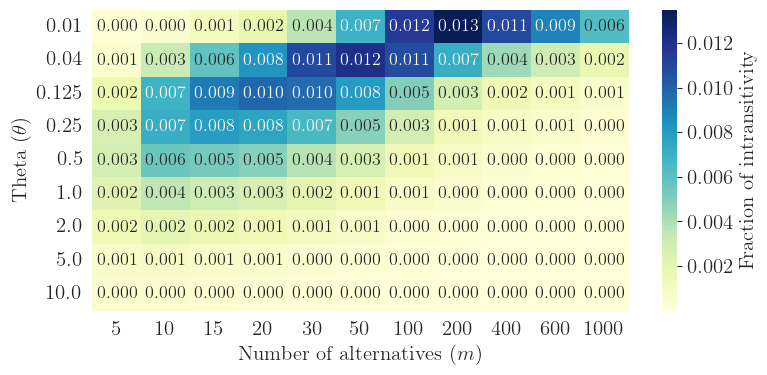

In [16]:
sns.set_style("white")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cm'
mpl.rcParams['font.size'] = 15

# Plot with error bars
plt.figure(figsize=(8, 4))

# Add a gap between the first and second row
df_results_numeric_with_gap = df_results_numeric.copy()
gap_row = pd.Series([np.nan] * df_results_numeric_with_gap.shape[1], index=df_results_numeric_with_gap.columns)
df_results_numeric_with_gap.loc[0.1] = gap_row
df_results_numeric_with_gap.sort_index(inplace=True)

sns.heatmap(df_results_numeric, annot=True, fmt=".03f", cmap="YlGnBu", cbar=True, 
            cbar_kws={'label': 'Fraction of intransitivity'}, annot_kws={'size': 13})

# Modify axis labels
plt.xlabel(r'Number of alternatives ($m$)')
plt.ylabel(r'Theta ($\theta$)')

plt.tight_layout()
plt.savefig(FIG_DIR / "7_2_dirichlet_alpha.png", dpi=300)
plt.savefig(FIG_DIR / "7_2_dirichlet_alpha.pdf")

In [25]:
m = 200
alpha = 0.01
rng = np.random.default_rng(2804)
alpha_vec = np.ones(m) * alpha
lotteries = rng.dirichlet(alpha_vec, 20)
lotteries

array([[1.71876239e-010, 4.61212647e-027, 2.13296608e-142, ...,
        5.32801775e-040, 1.69176952e-070, 4.96799535e-005],
       [1.43243234e-106, 1.61257235e-031, 5.45828290e-026, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.58017678e-061, 2.00089716e-033, 5.39104904e-107, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [1.89347282e-117, 1.76043430e-003, 3.14756768e-010, ...,
        2.16392137e-012, 8.79693180e-010, 4.68789914e-019],
       [5.40281138e-025, 2.20797455e-039, 4.68543488e-150, ...,
        1.19992735e-016, 1.68557890e-020, 0.00000000e+000],
       [2.30132959e-033, 1.96070839e-077, 5.91824008e-046, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [27]:
np.sum(lotteries > 0.1, axis=1)

array([3, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 3, 3, 1, 2, 4, 3, 3])

<Axes: >

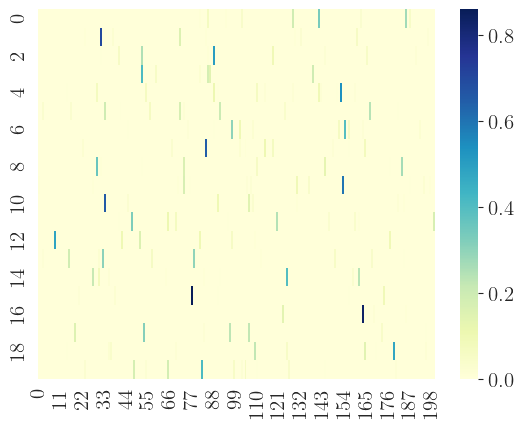

In [30]:
sns.heatmap(lotteries, fmt=".03f", cmap="YlGnBu", cbar=True)

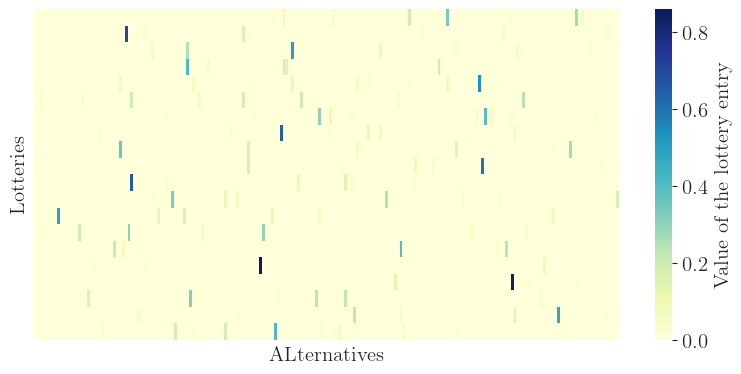

In [33]:
sns.set_style("white")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cm'
mpl.rcParams['font.size'] = 15

# Plot with error bars
plt.figure(figsize=(8, 4))

# Add a gap between the first and second row
sns.heatmap(lotteries, annot=False, cmap="YlGnBu", cbar=True, 
            cbar_kws={'label': 'Value of the lottery entry'})

# Modify axis labels
plt.xlabel(r'ALternatives')
plt.ylabel(r'Lotteries')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig(FIG_DIR / "7_2_typical lottery.png", dpi=300)
plt.savefig(FIG_DIR / "7_2_typical lottery.pdf")